# Welcome to "CrushPython"

Taste and see that the LORD is good; blessed is the man who takes refuge in him.
Psalms 34:8

----------

# [The Monty Hall Problem](http://en.wikipedia.org/wiki/Monty_Hall_problem)

Here's a fun and perhaps surprising statistical riddle, and a good way to get some practice writing python functions.

In a gameshow, contestants try to guess which of 3 closed doors contain a cash prize (goats are behind the other two doors). Of course, the odds of choosing the correct door are 1 in 3. As a twist, the host of the show occasionally opens a door after a contestant makes his or her choice. This door is always one of the two the contestant did not pick, and is also always one of the goat doors (note that it is always possible to do this, since there are two goat doors). At this point, the contestant has the option of keeping his or her original choice, or swtiching to the other unopened door. The question is: is there any benefit to switching doors? The answer surprises many people who haven't heard the question before.

We can answer the problem by running simulations in Python. We'll do it in several parts.


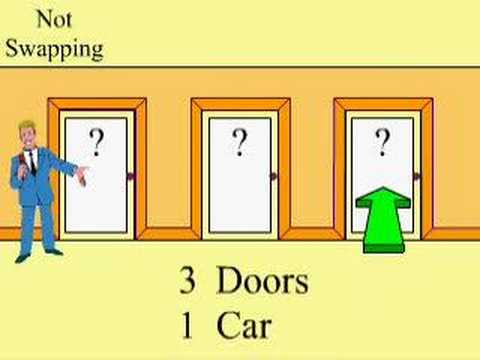

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('mhlc7peGlGg') 

### [Refer to another good explanation of Monty Hall in Korean](https://m.blog.naver.com/jjaprince/220278302374)

## Step 1: 
First, write a function called `simulate_prizedoor`. This function will simulate the location of the prize in many games -- see the detailed specification below:

In [2]:
# simulate_prizedoor.py
# CrushPython - MontyHall
import numpy as np                # to use random.randint(......)
import random                    

def simulate_prizedoor(nsim):
    """    
    Return a random array or list of 0s, 1s, and 2s. 
    The length of the array or list is the parameter nsim - a positive integer. 
    nsim represents the number of simulation. 
    
    This functio generates a random array of 0s, 1s, and 2s, representing 
    hiding a prize between door 0, door 1, and door. 
    
    Use random.randint(0,2) to generate the numbers of 0, 1, and 2 randomly.

    >>> print(simulate_prizedoor(3))
    [0, 0, 2]                           # Door 0 has the prize at the first sim.
    >>> print(simulate_prizedoor(7))
    [2, 1, 0, 1, 1, 0, 2]               # Door 2 has the prize at the first sim.
    """
 
    assert nsim >= 1
    prizedoors = [random.randint(0,2) for x in range(nsim)]
    
    
    
    return prizedoors

In [3]:
simulate_prizedoor(3)
print(simulate_prizedoor(3))

[2, 1, 0]


## Step 2: 
Next, write a function that simulates the contestant's guesses for `nsim` simulations. Call this function `simulate_guess`. The specs:

In [4]:
# simulate_guess.py
# CrushPython - MontyHall

import numpy as np
import random

def simulate_guess(nsim):
    """
    Return an arry of list that is  a strategy for guessing which door 
    a prize is behind. This could be a random strategy, one that always 
    guesses 2, whatever.

    nsim is the number of simulations to generate guesses for

    >>> simulate_guess(5)
    [0, 0, 0, 0, 0]
    """
    assert nsim >= 1
    guesses = [random.randint(0,2) for x in range(nsim)]

    return guesses

In [5]:
simulate_guess(5)

[1, 1, 2, 2, 1]

## Step 3: 
Next, write a function, `goat_door`, to simulate randomly revealing one of the goat doors that a contestant didn't pick.

In [6]:
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [7]:
# goat_door.py
# CrushPython - MontyHall
import numpy as np
import random

def goat_door(prizedoors, guesses):
    """ Return the goat door that is opened for each simulation. 
    Each item is 0, 1, or 2, and is different from both prizedoors and guesses.
    
    It simulates the opening of a "goat door" that doesn't contain the prize,
        and is different from the contestants guess
    The prizedoors array or list is the door that the prize is behind 
        in each simulation
    The guesses array or list is the door that the contestant guessed 
        in each simulation
        
    remove(element) removes the first matching element from the list.
    pop() removes the last element from the list.

    >>> print(goat_door(np.array([0, 1, 2]), np.array([1, 1, 1])))
    [2, 2, 0])              # [2, 0, 0] is valid too.
    """
    
    goatdoor = []
    x=0

    while (x != len(prizedoors)) :
        i=random.randint(0,2)
        if(prizedoors[x] != i != guesses[x]) :
            x = x+1
            goatdoor.append(i)
        
    return goatdoor


In [8]:
print(goat_door(np.array([0, 1, 2]), np.array([0, 0, 0])))

[2, 2, 1]


## Step 4: 
Write a function, `switch_guess`, that represents the strategy of always switching a guess after the goat door is opened.

In [9]:
# switch_guess.py
# ChrushPython - MontyHall

def switch_guess(guesses, goatdoors):
    """ Return the new door after switching. Should be different from 
    both guesses and goatdoors.
    The parameter guesses is an array or list of original guesses for 
        each simulation 
    The parameter goatdoors is an array list of of revealed goat doors for 
        each simulation
    The strategy that always switches a guess after the goat door is opened
    
    remove(element) removes the first matching element from the list.
    pop() removes the last element from the list.
    
    >>> print(switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1])))
    [2, 0, 0]                      # [2, 0, 0] is valid
    """
    switchguess = []

    for i in range(len(goatdoors)) :
        for x in range(3) :
            if guesses[i] != x != goatdoors[i] :
                switchguess.append(x)
                break
    
    return switchguess

In [10]:
print(switch_guess(np.array([0, 1, 2]), np.array([0, 0, 0])))

[1, 2, 1]


## Step 5 - Almost finished...: 
Last function: write a `win_percentage` function that takes an array of `guesses` and `prizedoors`, and returns the percent of correct guesses

In [11]:
# win_percentage.py
# CrushPython - MontyHall

def win_percentage(guesses, prizedoors):
    """ Return the win percentage between 0 and 100. 
    win_percentage is calculated by the percent of times that a simulation of 
        guesses is correct
    The parameters: 
    guesses is an array or list of guesses for each simulation
    prizedoors is an array or list of the location of prize for each simulation

    >>> print(win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0])))
    33.333
    """
    
    wins = [(prizedoors[i] == guesses[i])*1 for i in range(len(guesses))]
    winpercentage = [round((wins.count(1)/len(wins))*100,3)]
    
    return winpercentage

In [12]:
win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))

[33.333]

# Congratulations!

## Step 6 - The final step: 
Now, put it together. Simulate (nsim=1000) games where contestant keeps his original guess versus where the contestant switches his door after a  goat door is revealed. 

Compute the percentage of time the contestant wins under either strategy. Is one strategy better than the other?

__A sample run:__
```
Winning Rate with the original guess: 0.324
Winning Rate with the switched guess: 0.647
```

In [13]:
# MontyFall.py
# CrushPython - MontyHall

nsim = 1000
#keep original guess each time for nsim times

# your code here
prizedoors =  simulate_prizedoor(nsim)
guess = simulate_guess(nsim)

print("Winning Rate with the original guess:", win_percentage(guess, prizedoors))

#switch everytime for nsim

# your code here

switch = switch_guess(guess,goat_door(prizedoors, guess))

print("Winning Rate with the switched guess:", win_percentage(switch, prizedoors))

Winning Rate with the original guess: [33.7]
Winning Rate with the switched guess: [66.3]


# Challenge: Plot the simulation process. 
As the number of simulation increases, the winning rate converges as we computed above. In the plot, the x-axis is the number of simulation, and the y-axis the winning rate.

__A sample run:__
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/montyhall_plot.png?raw=true" width="400">
<center>Monty Hall problem winning rate simulation</center>

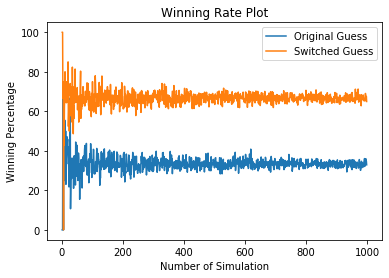

In [17]:
# MontyFallPlot.py
# Author: Youngsup Kim - idebtor@gmail.com

import matplotlib.pyplot as plt
%matplotlib inline

nsim = 1000 



win_rate_keep = []
for n in range(1, nsim): 
    prizedoors =  simulate_prizedoor(n)
    guess = simulate_guess(n)
    switch = switch_guess(guess,goat_door(prizedoors, guess))
    win_rate_keep.append(win_percentage(guess, prizedoors))
    
plt.plot([x for x in range(1, nsim)], win_rate_keep, label='Original Guess') 

win_rate_swap = []
for n in range(1, nsim):
    prizedoors =  simulate_prizedoor(n)
    guess = simulate_guess(n)
    switch = switch_guess(guess,goat_door(prizedoors, guess))
    win_rate_swap.append(win_percentage(switch, prizedoors))

plt.plot([x for x in range(1, nsim)], win_rate_swap, label='Switched Guess')  
plt.title("Winning Rate Plot")
plt.xlabel("Number of Simulation")
plt.ylabel("Winning Percentage")
plt.legend() 

### Fianl Note:
Many people find this answer counter-intuitive (famously, PhD mathematicians have incorrectly claimed the result must be wrong. Clearly, none of them knew Python). 

One of the best ways to build intuition about why opening a Goat door affects the odds is to re-run the experiment with 100 doors and one prize. If the game show host opens 98 goat doors after you make your initial selection, would you want to keep your first pick or switch? Can you generalize your simulation code to handle the case of `n` doors?

-----
__너희는 여호와의 선하심을 맛보아 알지어다. 그에게 피하는 자는 복이 있도다.__ 시34:8